In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "/Users/unclepete/Documents/lab2-redes-/fletcher_py/resultados.csv"
data = pd.read_csv(path)
data.head()

,Trama,Tamaño de Trama,Tamaño de Bloque,Error
0,NaN,0,0,1
1,01101101,8,4,1
2,NaN,0,4,1
3,NaN,0,0,1
4,NaN,0,0,1


In [5]:
data_cleaned = data.dropna(subset=['Trama'])
data_cleaned.head()

,Trama,Tamaño de Trama,Tamaño de Bloque,Error
1,01101101,8,4,1
9,00110111,8,4,1
10,11101001,8,4,1
11,11001101,8,4,1
12,01101000,8,4,1


In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 1 to 26796
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Trama             19677 non-null  object
 1   Tamaño de Trama   19677 non-null  int64 
 2   Tamaño de Bloque  19677 non-null  int64 
 3   Error             19677 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 768.6+ KB


In [8]:
data_cleaned.describe()

,Tamaño de Trama,Tamaño de Bloque,Error
count,19677.000000,19677.000000,19677.000000
mean,19.094679,6.658332,0.926920
std,9.364425,1.888592,0.260275
min,1.000000,4.000000,0.000000
25%,16.000000,4.000000,1.000000
50%,17.000000,8.000000,1.000000
75%,32.000000,8.000000,1.000000
max,33.000000,8.000000,1.000000


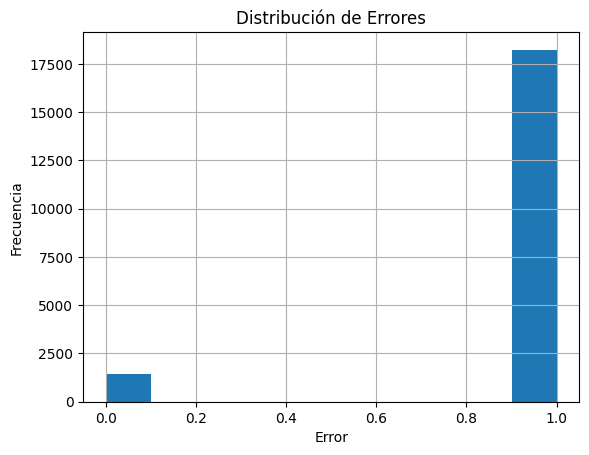

In [9]:
data_cleaned['Error'].hist()
plt.title('Distribución de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

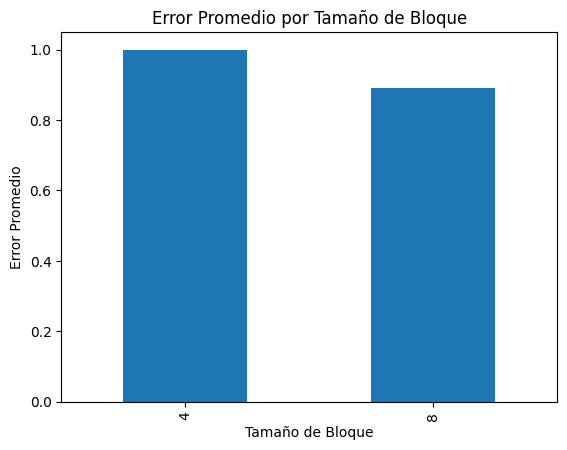

In [10]:
data_cleaned.groupby('Tamaño de Bloque')['Error'].mean().plot(kind='bar')
plt.title('Error Promedio por Tamaño de Bloque')
plt.xlabel('Tamaño de Bloque')
plt.ylabel('Error Promedio')
plt.show()


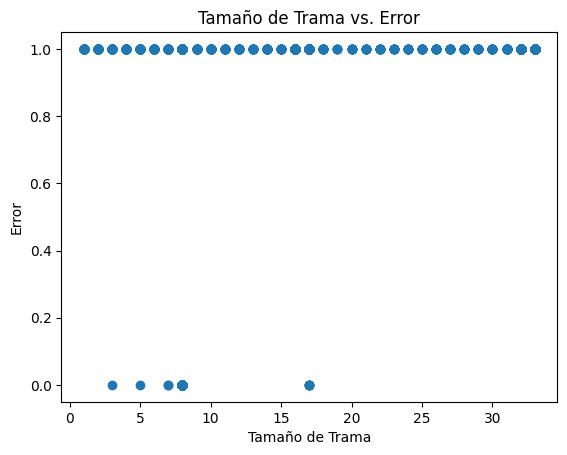

In [11]:
plt.scatter(data_cleaned['Tamaño de Trama'], data_cleaned['Error'])
plt.title('Tamaño de Trama vs. Error')
plt.xlabel('Tamaño de Trama')
plt.ylabel('Error')
plt.show()

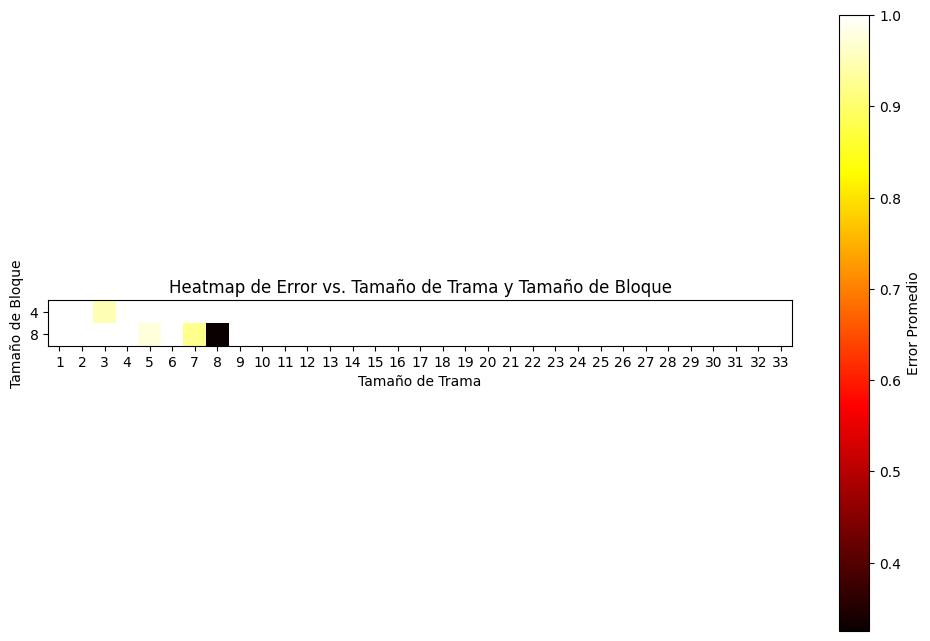

In [13]:
plt.figure(figsize=(12, 8))
heatmap_data = data_cleaned.pivot_table(values='Error', index='Tamaño de Bloque', columns='Tamaño de Trama', aggfunc='mean')
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.title('Heatmap de Error vs. Tamaño de Trama y Tamaño de Bloque')
plt.xlabel('Tamaño de Trama')
plt.ylabel('Tamaño de Bloque')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.colorbar(label='Error Promedio')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
for size in data_cleaned['Tamaño de Trama'].unique():
    subset = data_cleaned[data_cleaned['Tamaño de Trama'] == size]
    plt.hist(subset['Error'], bins=[0, 1, 2], alpha=0.5, label=f'Tamaño de Trama: {size}')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores por Tamaño de Trama')
plt.legend()
plt.show()